# Compute performance metrics for the given Y and Y_score without sklearn

In [4]:
import numpy as np
import pandas as pd

In [ ]:
df_a=pd.read_csv('5_a.csv')
df_a.head

<bound method NDFrame.head of          y     proba
0      1.0  0.637387
1      1.0  0.635165
2      1.0  0.766586
3      1.0  0.724564
4      1.0  0.889199
...    ...       ...
10095  1.0  0.665371
10096  1.0  0.607961
10097  1.0  0.777724
10098  1.0  0.846036
10099  1.0  0.679507

[10100 rows x 2 columns]>

In [ ]:
df_a.groupby('y').nunique()

,proba
y,
0.0,100
1.0,10000



## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> The Number of positive datapoint >> number of negative datapoint.
   <b>Note 2:</b> we will only use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> we need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<b>Tasks</b>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, we need to compute different thresholds and for each threshold we have to compute
tpr,fpr and then we can use numpy.trapz(tpr_array, fpr_array) 
<a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>,
<a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note: This should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)

Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>

<li> Compute Accuracy Score </li>
</ol>
</pre>

##Confusion Matrix

In [ ]:
df_a['y_pred'] = np.where(df_a['proba']<0.5, 0, 1)

In [ ]:
#1 Confusion Matrix:
from sklearn.metrics import confusion_matrix

def confusion_matrix_scratch(data, direct = 0):
  # Adding column y_pred where proba < 0.5 as 0 and where proba > 0.5 as 1
  
  TN = data[(data['y_pred']==0) & (data['y']==0)].shape[0]
  FN = data[(data['y_pred']==0) & (data['y']==1)].shape[0]
  FP = data[(data['y_pred']==1) & (data['y']==0)].shape[0]
  TP = data[(data['y_pred']==1) & (data['y']==1)].shape[0]

  
  
  tn, fp, fn, tp = confusion_matrix(data['y'], data['y_pred']).ravel()

  if(direct == 1):
    print("Computed from sklearn library -----")
    print("True Negative : {0}".format(tn))
    print("false Positive : {0}".format(fp))
    print("false Negative : {0}".format(fn))
    print("True Positive : {0}".format(tp))

    print("Computed from Scratch Code -------")
    print("True Negative : {0}".format(TN))
    print("false Positive : {0}".format(FP))
    print("false Negative : {0}".format(FN))
    print("True Positive : {0}".format(TP)) 

  else:
    return (TN, FN, FP, TP)




[[    0   100]
 [    0 10000]]


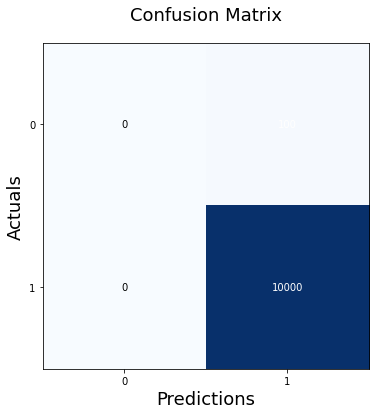

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_prebuilt(data):
  data['y_pred'] = np.where(data['proba']<0.5, 0, 1)
  conf_matrix = confusion_matrix(y_target=data['y'], y_predicted=data['y_pred']) 
  print(conf_matrix)
  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


confusion_matrix_prebuilt(df_a)

##F1 Score

In [ ]:
# formula for F1 score = 2*precision*recall/(precision+recall)
from sklearn.metrics import confusion_matrix, f1_score

def F1_score_scratch(data):
  TN, FN, FP, TP = confusion_matrix_scratch(data)
  precision = TP/(FP+TP)
  recall = TP/(FN+TP)

  print("F1_Score from SKlearn library : {}".format(f1_score(data['y'], data['y_pred'])))

  print("F1_Score from Scratch Code : {}".format((2*precision*recall)/(precision+recall)))



# Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy_score_scratch(data):
  print("Accuracy Score from Scratch : {}".format(accuracy_score(data['y'], data['y_pred'])))
  print("Accuracy Score from SKlearn : {}".format(((data[data['y']==data['y_pred']]).shape[0]/(data.shape[0]))))


#AUC

In [ ]:
from sklearn import metrics
def AUC(data):
  rslt_df = data.sort_values(by = 'proba', ascending = False)
  tpr = []
  fpr = []
  for value in rslt_df['proba']:
    data['y_pred'] = np.where(data['proba'] < value, 0, 1)
    TN, FN, FP, TP = confusion_matrix_scratch(data)

    tpr.append(TP/(TP+FN))
    fpr.append(FP/(TN+FP))

  #fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
  print("AUC as per sklearn : {}".format(metrics.auc(fpr, tpr)))
  print("AUC as per Code : {}".format(np.trapz(tpr, fpr)))

  

In [ ]:
# Confusion Matrix
confusion_matrix_scratch(df_a, direct =1)

# F1 Score 
F1_score_scratch(df_a)

# AUC
AUC(df_a)

# Accuracy Score
accuracy_score_scratch(df_a)



Computed from sklearn library -----
True Negative : 0
false Positive : 100
false Negative : 0
True Positive : 10000
Computed from Scratch Code -------
True Negative : 0
false Positive : 100
false Negative : 0
True Positive : 10000
F1_Score from SKlearn library : 0.9950248756218906
F1_Score from Scratch Code : 0.9950248756218906
AUC as per sklearn : 0.48829900000000004
AUC as per Code : 0.48829900000000004
Accuracy Score from Scratch : 0.9900990099009901
Accuracy Score from SKlearn : 0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data we can see number of positive points << number of negatives points
   <b>Note 2:</b> we will only use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> we need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, we need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note-We have to make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
del df_a
df_b=pd.read_csv('5_b.csv')
#df_b['y_pred'] = np.where(df_b['proba']<0.5, 0, 1)
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [ ]:
df_b['y_pred'] = np.where(df_b['proba']<0.5, 0, 1)
# Confusion Matrix
confusion_matrix_scratch(df_b, direct =1)

# F1 Score 
F1_score_scratch(df_b)

# Accuracy Score
accuracy_score_scratch(df_b)

# AUC
AUC(df_b)




Computed from sklearn library -----
True Negative : 9761
false Positive : 239
false Negative : 45
True Positive : 55
Computed from Scratch Code -------
True Negative : 9761
false Positive : 239
false Negative : 45
True Positive : 55
F1_Score from SKlearn library : 0.2791878172588833
F1_Score from Scratch Code : 0.2791878172588833
Accuracy Score from Scratch : 0.9718811881188119
Accuracy Score from SKlearn : 0.9718811881188119
AUC as per sklearn : 0.9377570000000001
AUC as per Code : 0.9377570000000001


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

we will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data we can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [ ]:
from sklearn import metrics
def ROC_value(data):
  rslt_df = data.sort_values(by = 'prob', ascending = False)
  ROC = {}
  for value in rslt_df['prob']:
    data['y_pred'] = np.where(data['prob'] < value, 0, 1)
    TN, FN, FP, TP = confusion_matrix_scratch(data)

    ROC[value] = 500*FN + 100*FP

  thres_low =  min(ROC, key=ROC.get)

  return thres_low


print(ROC_value(df_c))

0.2300390278970873



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [6]:
df_d=pd.read_csv('/content/drive/MyDrive/DIPLOMA/Assignments/5_Performance_metrics/5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


# Mean Square Error

In [82]:
MSE = pow(df_d['y'] - df_d['pred'],2).sum()/df_d['y'].shape[0]

from sklearn.metrics import mean_squared_error
print("MSE from Sklearn : {}".format(mean_squared_error(df_d['y'], df_d['pred'])))
print(f"MSE from scratch : {MSE}")

MSE from Sklearn : 177.16569974554707
MSE from scratch : 177.16569974554707


# Mape

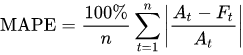

In [85]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE = ((abs((df_d['y'] - df_d['pred'])/(df_d['y'].mean())).sum())*(100/df_d['y'].shape[0]))
print(f"MAPE from SKlearn : {mean_absolute_percentage_error(df_d['y'], df_d['pred'])}") # due to zero Ai this could give large va;ue
print(f"MAPE from SKlearn : {MAPE}")

MAPE from SKlearn : 383407594230912.0
MAPE from SKlearn : 12.912029940096868


# R2

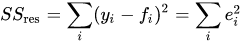


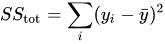


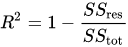

In [87]:
from sklearn.metrics import r2_score

SSres = pow(df_d['y']-df_d['pred'],2).sum()
SStot = pow((df_d['y']-df_d['y'].mean()),2).sum()

R2 = 1-(SSres/SStot)

print(f"R2 score form SKlearn : {r2_score(df_d['y'], df_d['pred'])}")
print(f"R2 score from scratch {R2}")

R2 score form SKlearn : 0.9563582786990937
R2 score from scratch 0.9563582786990937
